<a href="https://colab.research.google.com/github/Anya-ova/pytorch_classifier/blob/main/linear_model_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision.utils import make_grid
from torchvision.datasets import CIFAR10
from torchvision.transforms import ToTensor
from torchvision.transforms import Normalize, Compose
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
transform = Compose(
    [ToTensor(),
     Normalize((0.5, 0.5, 0.5),  # mean
               (0.5, 0.5, 0.5))] # std. deviation
)

In [3]:
training_data = CIFAR10(root="cifar",
                        train = True, # train set, 50k images
                        download = True,
                        transform=transform)
test_data = CIFAR10(root = "cifar",
                    train = False, # test set, 10k images
                    download = True,
                    transform = transform)

100%|██████████| 170498071/170498071 [00:13<00:00, 12645312.39it/s]


Extracting cifar/cifar-10-python.tar.gz to cifar
Files already downloaded and verified


In [4]:
batch_size = 4
train_dataloader = DataLoader(training_data, 
                              batch_size=batch_size, 
                              shuffle=True)
test_dataloader = DataLoader(test_data, 
                             batch_size=batch_size, 
                             shuffle=True)

In [5]:
for X, y in train_dataloader:
  print(f"Shape of X [N, C, H, W]: {X.shape}")
  print(f"Shape of y: {y.shape} {y.dtype}")
  break

Shape of X [N, C, H, W]: torch.Size([4, 3, 32, 32])
Shape of y: torch.Size([4]) torch.int64


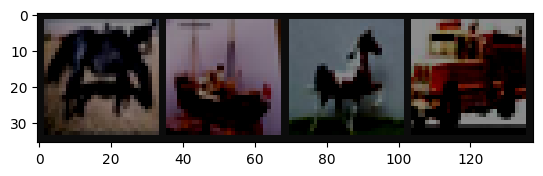

horse ship  horse truck


In [6]:
def imshow(img):
  img = img / 2 + .05 # revert normalization for viewing
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1,2,0)))
  plt.show()
  
classes = training_data.classes
training_data.classes

dataiter = iter(train_dataloader)
# images, labels = dataiter.next()
images, labels = next(dataiter)
imshow(make_grid(images))
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [7]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [8]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(32*32*3, 1024),
            nn.ReLU(),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )
    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits
        
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=3072, out_features=1024, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1024, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [9]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD( model.parameters(), lr=0.001 ) # momentum=0.9

In [10]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)
        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)
        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if batch % 2000 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [11]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [12]:
epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.262868  [    0/50000]
loss: 2.235204  [ 8000/50000]
loss: 2.630241  [16000/50000]
loss: 1.321083  [24000/50000]
loss: 1.562536  [32000/50000]
loss: 2.685537  [40000/50000]
loss: 1.494002  [48000/50000]
Test Error: 
 Accuracy: 39.8%, Avg loss: 1.713698 

Epoch 2
-------------------------------
loss: 2.585518  [    0/50000]
loss: 2.344632  [ 8000/50000]
loss: 1.821726  [16000/50000]
loss: 2.074328  [24000/50000]
loss: 1.214689  [32000/50000]
loss: 1.643433  [40000/50000]
loss: 2.105518  [48000/50000]
Test Error: 
 Accuracy: 45.1%, Avg loss: 1.567960 

Epoch 3
-------------------------------
loss: 1.011833  [    0/50000]
loss: 1.602669  [ 8000/50000]
loss: 1.613402  [16000/50000]
loss: 1.189451  [24000/50000]
loss: 1.208729  [32000/50000]
loss: 0.827125  [40000/50000]
loss: 1.109286  [48000/50000]
Test Error: 
 Accuracy: 47.8%, Avg loss: 1.487063 

Epoch 4
-------------------------------
loss: 2.032939  [    0/50000]
loss: 1.690580  [ 8000/5

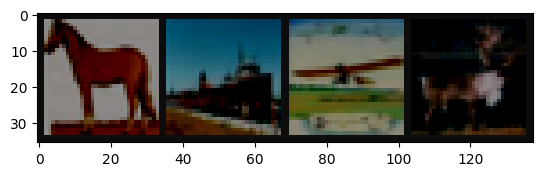

Ground Truth:  horse ship  airplane deer 


In [13]:
dataiter = iter(test_dataloader)
images, labels = next(dataiter)
imshow(make_grid(images))
print('Ground Truth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [14]:
outputs = model(images.cuda())
_, predicted = torch.max(outputs, 1)
print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}' for j in range(4)))

Predicted:  horse truck airplane ship 


In [15]:
correct = 0
total = 0
with torch.no_grad():
   for data in test_dataloader:
     images, labels = data
     outputs = model(images.cuda())
     _, predicted = torch.max(outputs.data, 1)
     total += labels.size(0)
     correct += (predicted == labels.cuda()).sum().item()
     
print(f'Model accuracy: {100 * correct // total} %')

Model accuracy: 53 %


In [16]:
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0  for classname in classes}
with torch.no_grad():
  for data in test_dataloader:
    images, labels = data
    outputs = model(images.cuda())
    _, predictions = torch.max(outputs, 1)
    for label,prediction in zip(labels, predictions):
      if label == prediction:
        correct_pred[classes[label]] += 1
      total_pred[classes[label]] += 1
for classname, correct_count in correct_pred.items():
  accuracy = 100 * float(correct_count) / total_pred[classname]
  print(f'Accuracy for class {classname:5s}: {accuracy:.1f}%')

Accuracy for class airplane: 55.0%
Accuracy for class automobile: 68.6%
Accuracy for class bird : 40.7%
Accuracy for class cat  : 36.0%
Accuracy for class deer : 38.3%
Accuracy for class dog  : 40.8%
Accuracy for class frog : 72.5%
Accuracy for class horse: 57.6%
Accuracy for class ship : 70.5%
Accuracy for class truck: 54.8%
